In [1]:
# data source = 
# https://data.cso.ie/
# CSV file   HPA02	
# Residential Dwelling Property Transactions
# irish-property-transactons-HPA02.csv
# County  Dwelling Status  Stamp Duty   Event   Type of Buyer   Type of Sale Value

import pandas as pd
import numpy  as np
# import graphics package
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

# setup some filenames
csv_filename = "e:\\irish-property-transactons-HPA02-value.csv"
csv_result_filename = "e:\\irish-property-transactons-HPA02-results.csv"
counties_filename = "e:\\irish-counties.txt"

startyear = 2000
thisyear  = datetime.date.today().year

iptyear     = [1.1]
ipttypesale = [1.1]
iptvalue    = [1.1]
iptbuyer    = ["xx"]
iptcounty   = ["y"]

iptyearmin = 32766.1

# make up a list of applicable years
allyears1 = ""
allyears2 = []
lookyear = startyear
for y1 in range(thisyear - startyear):
    allyears1 = allyears1 + str(lookyear)
    allyears2.append(str(lookyear))
    lookyear=lookyear+1


In [2]:
# A routine to generate a single box plot to the screen
# the input arry is in  ary1 and the name of the arry is in namOfArr

def boxplot(ary1 = [],namOfArr = "",x_label = "",y_label=""):
    plt.boxplot(ary1)
    plt.figtext(.40, .92, namOfArr,backgroundcolor='white', color='black', weight='roman')            
    print("Box plot of "+namOfArr)
    plt.ylabel(y_label+" ")
    plt.xlabel(x_label+" ") 
    plt.show()  
    print("#")
    return( 0)


In [3]:
print("")
print("Reading in Iish counties listing.")
with open(counties_filename) as f:
    counties = [line.rstrip('\n') for line in f]
# making a long list of all the coujty names
y1=0
y2=len(counties)-1
allcounties1 = ""
allcounties2 = []
allcounties3 = []
while y1<=y2:
    allcounties1 = allcounties1+counties[y1]
    allcounties2.append(counties[y1])
    y1=y1+1
print("Reading in Iish counties listing - Done.")



Reading in Iish counties listing.
Reading in Iish counties listing - Done.


In [4]:
#dfnetf = pd.read_csv("e:\\netflix_titles.csv")
ipt = pd.read_csv(csv_filename)
#np_ipt = np.array(ipt)
ipt.head()


,Statistic,Year,County,Dwelling Status,Stamp Duty Event,Type of Buyer,Type of Sale,UNIT,VALUE
0,Value of Sales,2010,All Counties,All Dwelling Statuses,Filings,All Buyer Types,All Sale Types,Euro Million,5620.1
1,Value of Sales,2010,All Counties,All Dwelling Statuses,Filings,All Buyer Types,Market,Euro Million,5187.5
2,Value of Sales,2010,All Counties,All Dwelling Statuses,Filings,All Buyer Types,Non-Market,Euro Million,432.6
3,Value of Sales,2010,All Counties,All Dwelling Statuses,Filings,Household Buyer - All,All Sale Types,Euro Million,5414.8
4,Value of Sales,2010,All Counties,All Dwelling Statuses,Filings,Household Buyer - All,Market,Euro Million,5015.6


In [5]:
# drop any row with incomplete data
print("")
print("Dropping rows with empty slots")
print("Number of rows before: ",ipt.shape[0])      # ref= https://datagy.io/pandas-number-of-rows/   visited: 06-03-2022
ipt= ipt.dropna(axis = 0, how ='any')              # ref= https://www.geeksforgeeks.org/drop-rows-from-pandas-dataframe-with-missing-values-or-nan-in-columns/  visited: 06-03-2022
print("Number of rows after : ",ipt.shape[0])      # ref= https://datagy.io/pandas-number-of-rows/   visited: 06-03-2022
print("Done")




Dropping rows with empty slots
Number of rows before:  34992
Number of rows after :  34992
Done


In [6]:
# sort what is left
print("")
print("Sorting input")
ipt = ipt.sort_values(by=['Year','County','Dwelling Status'],ascending=True)
print("Done")



Sorting input
Done


In [7]:
# drop any duplicates after sorting
print("")
print("Dropping duplicates")
print("Number of rows before: ",ipt.shape[0])     # ref= https://datagy.io/pandas-number-of-rows/   visited: 06-03-2022
ipt.drop_duplicates(subset=['Year','County','Dwelling Status']) # ref= https://datagy.io/pandas-number-of-rows/   visited: 06-03-2022
print("Number of rows after : ",ipt.shape[0])   
print("Done")



Dropping duplicates
Number of rows before:  34992
Number of rows after :  34992
Done


In [8]:
print("")
print("Grouping some data.")
yeargrouped = ipt.groupby(['Year']).mean()
countygrouped = ipt.groupby(['County']).mean()
print("Grouping some data- done.")




Grouping some data.
Grouping some data- done.


In [9]:
print("")
print("Breaking up data into stand alone lists.")
print("Length of dataframe :" ,ipt.shape[0])

yeargrouped = ipt.groupby(['Year']).mean()
eurogrouped = ipt.groupby(['VALUE']).mean()
countygroup = ipt.groupby(['County']).mean()

# use   iloc
# and
# convert away from  numpy into a simple list
iptyear     = np.array(ipt.iloc[:,1]).tolist()
iptsale     = np.array(ipt.iloc[:,6]).tolist()
ipteuro     = np.array(ipt.iloc[:,8]).tolist()
iptbuyer    = np.array(ipt.iloc[:,5]).tolist()
iptcounty   = np.array(ipt.iloc[:,2]).tolist()

#iptyear     = ipt.iloc[:,1]
#iptsale     = ipt.iloc[:,6]
#ipteuro     = ipt.iloc[:,8]
#iptbuyer    = ipt.iloc[:,5]
#iptcounty   = ipt.iloc[:,2]

# converting from  pandas to string/float
#iptyear.astype(int)
#iptsale.astype(str)
#ipteuro.astype(float)
#iptbuyer.astype(str)
#iptcounty.astype(str)


print("")
print("Breaking up data into stand alone lists - Done.")



Breaking up data into stand alone lists.
Length of dataframe : 34992

Breaking up data into stand alone lists - Done.


In [10]:
### now to clean out unwated values
# the wanted data is  ALL BUYER TYPES for ALL SALES TYPE
# I Dont want to MIX and duplicate the info
print("")
print("Cleaning up data into stand alone lists.")
y1 = 0
y2 = len(iptyear)-1
dropcount = 0
print("Length of array before: ",y2)
while y1<=y2:
    dropnow = 0
    # "All Buyer Types","All Sale Types"
    if ( iptsale[y2] != 'All Buyer Types' and iptbuyer[y2]!='All Buyer Types' ):
        dropnow = 1
        
    if ( iptcounty[y2]=='All Counties' ):
        dropnow = 1

    # this section is quicker than the next section of code
    if ( dropnow == 1 ):
        iptyear[y2] = 0
        iptsale[y2] = "XXX"
        ipteuro[y2] = 0.0
        iptbuyer[y2] = "XXX"
        iptcounty[y2] = "XXX"
    y1=y1+1
    
# took too long to delete each element in turn - just make them an invalid entry = quicker        
#        if ( dropnow == 1 ):
#            tmpnp = np.delete(iptyear,y2) 
#            iptyear = tmpnp        
#            tmpnp = np.delete(iptsale,y2)
#            iptsale = tmpnp        
#            tmpnp = np.delete(ipteuro,y2)
#            ipteuro = tmpnp        
#            tmpnp = np.delete(iptbuyer,y2)
#            iptbuyer = tmpnp        
#            tmpnp = np.delete(iptcounty,y2)
#            ipcounty = tmpnp        
#            dropcount=dropcount+1
#            print("dropping invalid info",dropcount)
#    y2=y2-1
#y2 = len(iptyear)-1

#iptyear2 = iptyear
#iptsale2 = iptsale
#ipteuro2 = ipteuro
#iptbuyer2 = iptbuyer
#iptcounty2 = iptcounty
#
#iptyear    = []
#iptsale    = []
#ipteuro    = [] 
#iptbuyer   = []
#iptcounty  = []
#
#y1 = 0
#y2= len(iptyear)-1
#while  ( y1 <= y2):
#    if ( iptcounty2[y1] != "XXX"):
#        iptyear.append(iptyear2[y1])
#        ipteuro.append(ipteuro2[y1])
#        iptcounty.append(iptcounty2[y1])
#    y1=y1+1
#
#iptyear2   = []
#iptsale2   = []
#ipteuro2   = [] 
#iptbuyer2  = []
#iptcounty2 = []
#   
print("Length of array after : ",len(iptyear))
print("Cleaning up data into stand alone lists - Done.")




Cleaning up data into stand alone lists.
Length of array before:  34991
Length of array after :  34992
Cleaning up data into stand alone lists - Done.


In [11]:
print("")
print("Gathering some table info and totals based on county name.")
                           # https://stackoverflow.com/questions/568962/how-do-i-create-an-empty-array-matrix-in-numpy
#countyinfo= np.zeros(shape=(len(counties)+1,2))  #   times found, euro countytotal
# collect county info based on caounty name
countyinfo1 = []
countyinfo2 = []
countyinfo3 = []
countyinfo1.clear()    
countyinfo2.clear()
countyinfo3.clear()
for y1 in range(len(counties)-1):
    countyinfo1.append(0)
    countyinfo2.append(0.0)
    countyinfo3.append("XXX")
    
# y1 = index for outer loop
# y3 = index for inner loop
y1 = 0
y2 = len(counties)-1
y3 = 0
y4 = len(iptcounty)-1
for y1 in range(y2):
    if ( len(counties[y1] ) >0 ):
        y3 = 0
        for y3 in range(y4):
            if ( counties[y1] == iptcounty[y3]  ):
                countyinfo1[y1] = countyinfo1[y1] + 1            # increment counter by one
                countyinfo2[y1] = float(countyinfo2[y1]) + float(ipteuro[y3])   # add euro value to tota
                countyinfo3[y1] = iptcounty[y3]

print("Gathering some table info and totals based on county name - Done.")



Gathering some table info and totals based on county name.
Gathering some table info and totals based on county name - Done.


In [12]:
print("")
print("Gathering some table info and totals based on transaction year.")
# collect euro info info based on year

yearinfo1 = []  # the year
yearinfo2 = []  # the number of times
yearinfo3 = []  # the rolling total for that year
yearinfo1.clear()
yearinfo2.clear()
yearinfo3.clear()
for y1 in range(len(allyears1)-1):
    yearinfo1.append(0)
    yearinfo2.append(0.0)
    yearinfo3.append(0)

lookyear = startyear
y1 = 0
y2 = len(allyears1)-1
y3 = 0
y4 = len(iptyear)-1
for y1 in range(len(allyears2)-1):
    for y3 in range(y4):
        if ( lookyear == iptyear[y3]):
            yearinfo1[y1] = yearinfo1[y1]+1
            yearinfo2[y1] = yearinfo2[y1]+ipteuro[y3]
            yearinfo3[y1] = iptyear[3]
    lookyear = lookyear+1
    
print("---yearinfo---")
print(yearinfo1,yearinfo2,yearinfo3)
print("====yearinfo====")
print(countyinfo1,countyinfo2,countyinfo3)

print("Gathering some table info and totals based on transaction year - Done.")



Gathering some table info and totals based on transaction year.
---yearinfo---
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2916, 2916, 2916, 2916, 2916, 2916, 2916, 2916, 2916, 2916, 2916, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 255102.9000000001, 195768.90000000113, 228879.49999999965, 271129.0000000004, 412483.6999999989, 492656.9999999998, 546877.4000000026, 657777.9999999952, 728697.5000000013, 783036.3000000009, 680525.3999999977, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20

tmparry ==== [19610.200000000004, 22425.40000000001, 44158.29999999996, 293329.5000000003, 39461.90000000001, 1527450.7000000004, 120804.49999999984, 55852.80000000002, 168245.09999999977, 33851.699999999975, 28510.5, 11033.100000000011, 77575.5, 10355.300000000001, 59009.399999999994, 36309.300000000054, 121154.90000000018, 11979.90000000001, 20336.6, 18189.699999999993, 23915.699999999968, 43507.29999999997, 51969.199999999946, 34237.30000000002, 66066.00000000009] ====
Box plot of County Informtion


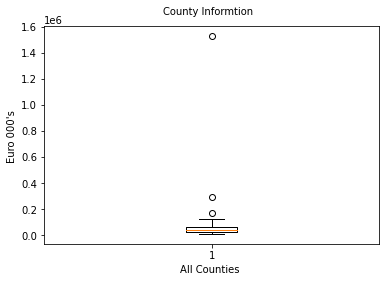

#


In [13]:
tmparry = []
y1=1
while y1 <= len(countyinfo2) -1:   
    tmparry.append(countyinfo2[y1])
    y1=y1+1
print("tmparry","====",tmparry,"====")
x = boxplot(tmparry,"County Informtion","All Counties","Euro 000's")


tmparry ==== [19610.200000000004, 22425.40000000001, 44158.29999999996, 293329.5000000003, 39461.90000000001, 1527450.7000000004, 120804.49999999984, 55852.80000000002, 168245.09999999977, 33851.699999999975, 28510.5, 11033.100000000011, 77575.5, 10355.300000000001, 59009.399999999994, 36309.300000000054, 121154.90000000018, 11979.90000000001, 20336.6, 18189.699999999993, 23915.699999999968, 43507.29999999997, 51969.199999999946, 34237.30000000002, 66066.00000000009] ====
Box plot of County Informtion


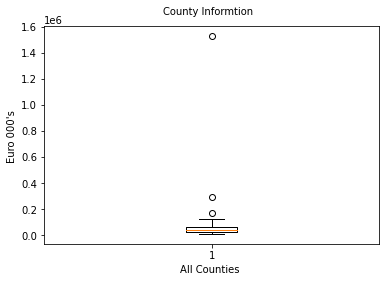

#


In [14]:
tmparry = []
y1=1
while y1 <= len(countyinfo2) -1:   
    tmparry.append(countyinfo2[y1])
    y1=y1+1
print("tmparry","====",tmparry,"====")
x = boxplot(tmparry,"County Informtion","All Counties","Euro 000's")



In [ ]:
# Import font
#font = FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc",size=12)
#y=0
#x_text = ["Send you a little red flower","Bomb Expert 2","Warm Hug","   ","From Sea Small Column: The Rings of Flame"," ","emergency rescue","Wishing Shenlong","Boar on the shore","Crazy Primitive 2",]
#x_text = counties
#y_values = [4601.59,2564.58,2233.85,1520.79,640.91,478.96,223.36,221.97,104.45,53.35]
# Create a canvas
#plt.figure(figsize=(15,8),dpi=80)
#plt.bar(x_text,y_values,width=0.5,bottom=10)
# Set the scale
#plt.xticks(range(10),x_text,rotation=90)
# Set the coordinate tag
#plt.xlabel('County',fontsize=15)
#plt.ylabel('Euro x1000',fontsize=15)
#plt.show()


In [ ]:
# make a scatter plot
print(len(tmparry1))
#x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
#x = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28])
x = np.array(counties)
#y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
y = np.array(tmparry1)
plt.scatter(x, y)
plt.show()


In [15]:
print("*** end ***")


*** end ***
